In [1]:
import pandas as pd
from matplotlib import pyplot

## Data Merge

In [12]:
daily = pd.read_csv('daily.csv')
daily = daily[['ticker', 'date', 'ev', 'evebit', 'evebitda', 'marketcap', 'pb', 'pe', 'ps']]
daily['date'] = pd.to_datetime(daily['date'])
daily.head()

,ticker,date,ev,evebit,evebitda,marketcap,pb,pe,ps
0,AAPL,2020-12-18,2227783.2,33.2,28.5,2153363.2,33.0,37.5,7.8
1,ADBE,2020-12-18,242233.7,59.6,48.6,241274.7,20.6,62.5,19.4
2,ADI,2020-12-18,57501.9,38.2,24.8,53412.7,4.5,43.8,9.5
3,ADP,2020-12-18,77571.8,23.6,20.5,76860.6,13.2,30.9,5.3
4,ADSK,2020-12-18,67628.2,116.9,96.4,67066.3,967.8,156.4,18.4


In [13]:
sf1 = pd.read_csv('sf1.csv')
sf1 = sf1[sf1['dimension'] == 'ARQ']
sf1 = sf1.drop(['Unnamed: 0', 'dimension','datekey', 'reportperiod', 'lastupdated', \
                'pb', 'pe', 'ps', 'ev', 'evebit', 'evebitda', 'marketcap', \
                'sharefactor', 'roa', 'roe', 'roic', 'ros', 'prefdivis', 'netincdis', 'netincnci', \
                'ncfx', 'invcapavg', 'intexp', 'fxusd', 'equityavg', 'deposits', 'assetturnover', 'assetsavg'], axis=1)
sf1 = sf1.rename(columns={'calendardate': 'date'})
sf1['date'] = pd.to_datetime(sf1['date'])
sf1.head()

,ticker,date,accoci,assets,assetsc,assetsnc,bvps,capex,cashneq,cashnequsd,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,AAPL,1997-09-30,0.0,4.233000e+09,3.424000e+09,809000000.0,0.085,NaN,1.230000e+09,1.230000e+09,...,1.433526e+10,1.411894e+10,NaN,NaN,4.233000e+09,259000000.0,NaN,264000000.0,0.300,1.606000e+09
1,AAPL,1997-12-31,0.0,4.126000e+09,3.373000e+09,753000000.0,0.087,38000000.0,1.193000e+09,1.193000e+09,...,1.487002e+10,1.433477e+10,1.566197e+10,0.110,4.126000e+09,233000000.0,0.0,261000000.0,0.288,1.704000e+09
2,AAPL,1998-03-31,0.0,3.963000e+09,3.213000e+09,750000000.0,0.094,-5000000.0,1.285000e+09,1.285000e+09,...,1.490054e+10,1.478053e+10,1.634248e+10,0.095,3.963000e+09,201000000.0,4000000.0,238000000.0,0.268,1.829000e+09
3,AAPL,1998-06-30,0.0,4.041000e+09,3.375000e+09,666000000.0,0.100,17000000.0,1.203000e+09,1.203000e+09,...,1.507961e+10,1.490362e+10,1.924003e+10,0.094,4.041000e+09,192000000.0,8000000.0,213000000.0,0.271,1.986000e+09
4,AAPL,1998-09-30,0.0,4.289000e+09,3.698000e+09,591000000.0,0.109,-7000000.0,1.481000e+09,1.481000e+09,...,1.515582e+10,1.511810e+10,1.880670e+10,0.103,4.289000e+09,182000000.0,8000000.0,173000000.0,0.284,2.178000e+09


In [15]:
ticker_list = daily.ticker.unique().tolist()

for ticker in ticker_list:
    temp_daily = daily[daily['ticker'] == ticker]
    temp_daily = temp_daily.sort_values(by='date', ascending=False)
    temp_sf1 = sf1[sf1['ticker'] == ticker]
    temp_sf1 = temp_sf1.sort_values(by='date', ascending=False)
    temp_sf1 = temp_sf1.drop_duplicates(subset=['date'], keep='first')
    temp_data = temp_daily.merge(temp_sf1, on = ['ticker', 'date'], how='left')
    eod = pd.read_csv('eod/{}.csv'.format(ticker))
    eod.columns= eod.columns.str.strip().str.lower()
    eod = eod.drop(['dividend', 'split'], axis=1)
    eod['date'] = pd.to_datetime(eod['date'])
    temp_data = temp_data.merge(eod, on='date')
    if temp_daily.shape[0] != temp_data.shape[0]:
        print(ticker, (temp_daily.shape[0], temp_data.shape[0]))
    temp_data = temp_data.fillna(method='backfill', axis=0)
    temp_data = temp_data[temp_data['date'] >= '2000-01-01']
    if temp_data.shape[0] < 5355:
        print(ticker, temp_data.shape[0])
    temp_data.to_csv('cleaned_data/{}.csv'.format(ticker), index=False)

ALGN 5084
ASML 4610
AVGO 2943
BIDU 3950
CDW 1964
CHTR 2839
DOCU 747
DXCM 4029
FB 2241
FOXA 528
GOOGL 4193
ILMN 5211
ISRG 5240
JD 1711
KDP 3258
KHC 1456
LULU 3454
MDLZ 4991
MELI 3444
MRNA 592
MRVL 5230
MTCH (5629, 1283)
MTCH 1283
NFLX 4757
NXPI 2691
NTES 4604
OKTA 1012
PDD 685
PTON 391
PYPL (1456, 1446)
PYPL 1446
SGEN 5057
SPLK 2262
TEAM (1346, 1345)
TEAM 1345
TCOM 4367
TMUS 3523
TSLA 2718
VRSK 2900
WDAY 2139
ZM 502


## Feature Selection

In [14]:
data = pd.read_csv('cleaned_data/AAPL.csv')
# data = pd.read_csv('cleaned_data/AAPL.csv', index_col=1)
data = data.drop(['ticker', 'date'], axis=1)
# X = data.to_numpy(dtype=float)
y = data[['adj_close']]
X = data.drop(['open', 'high', 'low', 'close', 'volume', \
               'adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume'], axis=1)
data.shape

(5355, 99)

In [15]:
y = y.iloc[:-1]
X = X.iloc[1:]
print(y.shape, X.shape)

(5354, 1) (5354, 89)


In [16]:
from sklearn.ensemble import RandomForestRegressor

<ipython-input-27-5ecd781835f6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, y)


[1.32639414e+02 3.60584256e+01 1.43801686e+01 5.82322665e+02
 5.04956574e+01 2.62327391e+00 1.02056455e+01 2.86444695e-03
 8.79697994e-03 1.65974473e-03 1.48564454e-02 3.51189882e-03
 2.56655474e-03 3.75252927e-03 3.67914299e-03 1.42599231e-03
 1.23652899e-03 7.74700146e-01 6.82320842e-02 1.53189550e-02
 3.34162807e-02 1.34732424e+01 1.23882568e-02 3.16956951e-03
 6.22740470e-03 5.45633607e-03 7.79530354e+01 7.92587952e-04
 3.04946909e-03 1.72613082e-03 1.68789882e-03 5.01435970e-03
 8.69341645e-04 3.04021225e-03 2.19938670e-03 1.66489704e-03
 2.29306396e+00 1.64914744e-03 2.88803676e-03 1.86101430e-03
 9.82509056e-04 3.78744263e-03 3.76213749e-01 9.95981797e-02
 2.60036196e+01 6.99495576e-03 2.07100419e-03 9.39928402e-02
 2.76672247e-03 1.15484464e-02 1.97029286e-01 1.94348199e-03
 5.31398690e-03 7.01644572e-03 3.87196584e-03 1.44612968e-01
 2.69866608e-03 3.55883280e-03 3.37943002e-03 2.41102163e-03
 1.35324672e-03 1.23944183e-03 2.78106538e-03 4.57830905e-03
 2.66939873e+01 1.725077

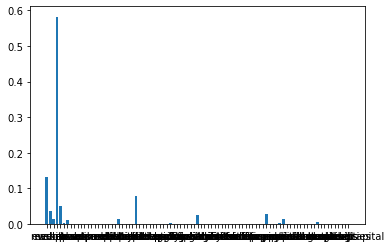

In [27]:
model = RandomForestRegressor(n_estimators=50, random_state=1)
model.fit(X, y)
importances = model.feature_importances_
# show importance scores
print(importances * 1000)
# plot importance scores
names = X.columns
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, importances)
pyplot.xticks(ticks, names)
pyplot.show()

In [28]:
for i in range(len(ticks)):
    print(names[i], importances[i]*100000)

ev 13263.941390449465
evebit 3605.842557460539
evebitda 1438.0168563388004
marketcap 58232.2664996403
pb 5049.565735544047
pe 262.3273912767745
ps 1020.5645534055429
accoci 0.28644469535655526
assets 0.8796979942804883
assetsc 0.16597447307531363
assetsnc 1.4856445393118134
bvps 0.35118988154713254
capex 0.25665547384902265
cashneq 0.3752529268494424
cashnequsd 0.36791429932847936
cor 0.1425992312486006
consolinc 0.12365289935825827
currentratio 77.47001464101791
de 6.823208418283421
debt 1.5318954994698177
debtc 3.341628073764335
debtnc 1347.3242402012543
debtusd 1.238825683107546
deferredrev 0.3169569514185737
depamor 0.6227404699118159
divyield 0.5456336067332769
dps 7795.303535514313
ebit 0.07925879517982126
ebitda 0.3049469094957098
ebitdamargin 0.17261308168988038
ebitdausd 0.16878988241370968
ebitusd 0.5014359700569284
ebt 0.08693416451892962
eps 0.3040212246783934
epsdil 0.21993867008838003
epsusd 0.16648970439873212
equity 229.30639601423812
equityusd 0.1649147436923553
fcf 0.

### Ad-hoc Analysis

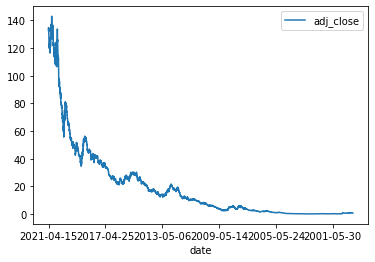

In [82]:
y.plot()
pyplot.show()

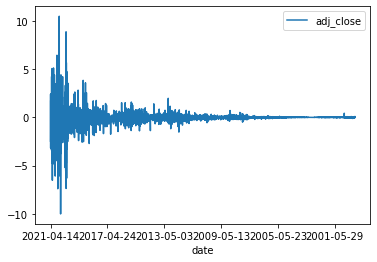

In [85]:
y_diff = y.diff(1)
y_diff = y_diff[1:]
y_diff.plot()
pyplot.show()

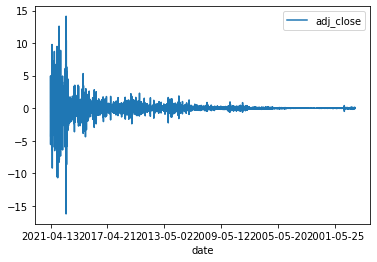

In [86]:
y_diff2 = y_diff.diff(1)
y_diff2 = y_diff2[1:]
y_diff2.plot()
pyplot.show()

In [ ]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
pca = PCA()
pca.fit(X)
components = pca.transform(X)
c = pd.DataFrame(components)
c.to_csv('c.csv')